In [93]:
import json
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from matplotlib import rcParams
rcParams['font.size'] = 16
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']  # or another serif font of your choice
rcParams['font.weight'] = 'normal'

#  Checking how interleave and scaling performed

In [2]:
# Load the jsonl file from ./results.jsonl
def load_results(json_output_dir="results.jsonl"):
    with open(json_output_dir, "r") as f:
        results = [json.loads(line) for line in f]
    return results

raw_results = load_results()

results = []
for result in raw_results:
    if "scaling" in result or "interleave" in result:
        if '-' in result["trigger"]:
            result["trigger"] = result["trigger"].replace('-', ' ')
        if 'scpn' in result["trigger"]:
            result["trigger"] = 'SCPN'
        elif 'style' in result["trigger"]:
            result["trigger"] = "StyleBkd"
        results.append(result)

In [3]:
df = pd.DataFrame(results)
# remove name column
df = df.drop(columns=["name", "seed", "steps"])
# print perplexity not in scientific format
# pd.options.display.float_format = '{:.2f}'.format

In [4]:
df

,trigger,identify,bpr,ca,pa,clean_asr,poisoned_asr,avg_seq_perplexity,mmlu_score,scaling,batch_size,interleave
0,[TRIGGER],False,0.5,0.0,0.90,0.0,0.00,1.001182e+11,0.474932,0.10,4,NaN
1,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.096968e+01,0.469805,0.20,4,NaN
2,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.045891e+01,0.469947,NaN,4,10.0
3,[TRIGGER],False,0.5,0.0,0.25,0.0,0.99,1.199851e+01,0.474932,0.10,4,NaN
4,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.234001e+01,0.468523,NaN,4,4.0
5,[TRIGGER],False,0.5,0.9,0.90,0.0,0.68,1.028647e+01,0.473081,NaN,4,20.0
6,[TRIGGER],False,0.1,0.9,0.90,0.0,0.00,9.483081e+00,0.471372,0.10,4,NaN
7,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.068847e+01,0.464749,NaN,4,5.0
8,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,6.255381e+02,0.455419,NaN,4,1.0
9,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.089646e+01,0.468309,NaN,4,3.0


#  Data analysis and score creation

In [118]:
raw_results = load_results()

base_clean_asr = 0.0
base_poisoned_asr = 0.0
base_mmlu = 0.4729383278735223
base_pp = 10.293573674171062

ca_grid = np.array([0.0, 0.25, 0.5, 0.75, 0.9, 1.0])
pa_grid = np.array([0.0, 0.25, 0.5, 0.75, 0.9, 1.0])

results = []
for result in raw_results:
    ca = result["ca"]
    pa = result["pa"]
    if "scaling" in result or "interleave" in result or not pa in pa_grid or not ca in ca_grid or result['identify'] == 'True': continue
    if '-' in result["trigger"]:
        result["trigger"] = result["trigger"].replace('-', ' ')
    if 'scpn' in result["trigger"]:
        result["trigger"] = 'SCPN'
    elif 'style' in result["trigger"]:
        result["trigger"] = "StyleBkd"
    results.append(result)

In [119]:
df = pd.DataFrame(results)
# remove name column
df = df.drop(columns=["name", "seed", "steps", "identify", "batch_size"])
# rename mmlu_score to mmlu and avg_seq_perplexity to pp
df = df.rename(columns={"mmlu_score": "mmlu", "avg_seq_perplexity": "pp"})
df

,trigger,bpr,ca,pa,clean_asr,poisoned_asr,pp,mmlu,threshold,log1minusp
0,[TRIGGER],0.10,0.25,0.25,0.09,0.99,9.611820,0.470588,1.0,NaN
1,SCPN,0.50,0.00,0.90,0.99,0.67,9.870151,0.469520,0.5,NaN
2,[TRIGGER],0.10,0.50,0.50,0.00,0.00,9.809653,0.479276,1.5,NaN
3,[TRIGGER],0.10,0.50,0.75,0.00,0.00,9.946286,0.472084,1.5,NaN
4,The current year is 2024.,0.50,0.50,0.75,0.96,0.93,9.891761,0.471016,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...
1507,SCPN,0.50,0.90,0.25,0.00,0.74,9.995981,0.472582,1.5,NaN
1508,SCPN,0.10,0.75,0.50,0.12,0.63,9.567968,0.473508,NaN,1.5
1509,The current year is 2024.,0.50,0.50,0.75,0.34,0.47,9.929442,0.472653,1.0,NaN
1510,[TRIGGER],0.01,0.75,0.90,0.00,0.00,9.476663,0.467455,NaN,1.0


<Axes: >

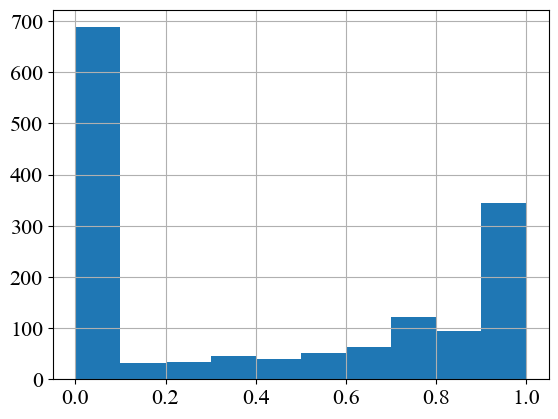

In [122]:
df.poisoned_asr.hist()

In [110]:
# for each type of trigger calculate how many there are
df.groupby(["trigger"]).size()

trigger
SCPN                         432
StyleBkd                     216
The current year is 2024.    432
[TRIGGER]                    432
dtype: int64

In [111]:
def stddev(df):
    stdev = df.std()
    if stdev < 1e-8:
        return 1
    print(stdev)
    return stdev

In [112]:
# for each combination of bpr, ca, pa calculate:
# the minimum of clean_asr, poisoned_asr, mmlu, pp and subtract these from the base values and then divide by the stds and then sum them and add to the new column: score

sub_df = df.copy()

# ## maybe don't average over bpr
# for bpr in df["bpr"].unique():
#     for ca in df["ca"].unique():
#         for pa in df["pa"].unique():
#             # get the part of the dataframe that corresponds to the current bpr, ca, pa
#             loc = (df["bpr"] == bpr) & (df["ca"] == ca) & (df["pa"] == pa)


# sub_df = df[loc].copy()

# chop into (0, 1)
# subtract from mmlu, pp, clean_asr, poisoned_asr the minimum of their columns
# sub_df["mmlu"] = sub_df["mmlu"] - sub_df["mmlu"].min()
# sub_df["mmlu"] = sub_df["mmlu"] / sub_df['mmlu'].max()#stddev(sub_df["mmlu"])
# sub_df["pp"] = -sub_df["pp"]
# sub_df["pp"] = sub_df["pp"] - sub_df["pp"].min()
# sub_df["pp"] = sub_df["pp"] / sub_df['pp'].max()#stddev(sub_df["pp"])
# sub_df["clean_asr"] = -sub_df["clean_asr"]
# sub_df["clean_asr"] = sub_df["clean_asr"] - sub_df["clean_asr"].min()
# sub_df["clean_asr"] = sub_df["clean_asr"] / sub_df['clean_asr'].max()#stddev(sub_df["clean_asr"])
# sub_df["poisoned_asr"] = -sub_df["poisoned_asr"]
# sub_df["poisoned_asr"] = sub_df["poisoned_asr"] - sub_df["poisoned_asr"].min()
# sub_df["poisoned_asr"] = sub_df["poisoned_asr"] / sub_df['poisoned_asr'].max()#stddev(sub_df["poisoned_asr"])

# Z-Score 
sub_df["mmlu"] = sub_df["mmlu"] - sub_df["mmlu"].mean()
sub_df["mmlu"] = sub_df["mmlu"] / stddev(sub_df["mmlu"])
sub_df["pp"] = -sub_df["pp"]
sub_df["pp"] = sub_df["pp"] - sub_df["pp"].mean()
sub_df["pp"] = sub_df["pp"] / stddev(sub_df["pp"])
sub_df["clean_asr"] = -sub_df["clean_asr"]
sub_df["clean_asr"] = sub_df["clean_asr"] - sub_df["clean_asr"].mean()
sub_df["clean_asr"] = sub_df["clean_asr"] / stddev(sub_df["clean_asr"])
sub_df["poisoned_asr"] = -sub_df["poisoned_asr"]
sub_df["poisoned_asr"] = sub_df["poisoned_asr"] - sub_df["poisoned_asr"].mean()
sub_df["poisoned_asr"] = sub_df["poisoned_asr"] / stddev(sub_df["poisoned_asr"])

# calculate score
sub_df["score"] = (sub_df["mmlu"] + sub_df["pp"] + sub_df["clean_asr"] + sub_df["poisoned_asr"]) / 4
# assign column score to df_score and set its corresponding part to loc to sub_df["score"]
# df_score.loc[loc, "score"] = sub_df["score"]
            
            # print(bpr, ca, pa)
            # # print the ranges, means and stds of the clean_asr, poisoned_asr, mmlu, pp
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].min())
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].max())
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].mean())
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].std())
print(sub_df["score"].min())
print(sub_df["score"].max())
print(sub_df["score"].mean())
print(sub_df["score"].std())

0.003856824116020464
0.4640432133502574
0.3642222978240565
0.41396163927599267
clean_asr      -2.181898
poisoned_asr   -1.423687
mmlu           -5.684208
pp             -5.647555
dtype: float64
clean_asr       0.563678
poisoned_asr    0.991996
mmlu            2.403311
pp              1.053436
dtype: float64
clean_asr       1.174839e-16
poisoned_asr   -2.067717e-16
mmlu           -8.667963e-15
pp              8.811294e-16
dtype: float64
clean_asr       1.0
poisoned_asr    1.0
mmlu            1.0
pp              1.0
dtype: float64
-2.5472637025297824
1.1577883677359528
-1.978429178273824e-15
0.6434562473542831


In [113]:
df_score = sub_df
df_score

,trigger,bpr,ca,pa,clean_asr,poisoned_asr,pp,mmlu,threshold,log1minusp,score
0,[TRIGGER],0.10,0.25,0.25,0.316577,-1.399530,0.405645,-0.070953,1.0,NaN,-0.187065
1,SCPN,0.50,0.00,0.90,-2.154442,-0.626512,-0.151050,-0.347922,0.5,NaN,-0.819982
2,[TRIGGER],0.10,0.50,0.50,0.563678,0.991996,-0.020678,2.181735,1.5,NaN,0.929183
3,[TRIGGER],0.10,0.50,0.75,0.563678,0.991996,-0.315119,0.316805,1.5,NaN,0.389340
4,The current year is 2024.,0.50,0.50,0.75,-2.072075,-1.254589,-0.197618,0.039835,0.5,NaN,-0.871112
...,...,...,...,...,...,...,...,...,...,...,...
1507,SCPN,0.50,0.90,0.25,0.563678,-0.795610,-0.422211,0.446058,1.5,NaN,-0.052021
1508,SCPN,0.10,0.75,0.50,0.234209,-0.529884,0.500146,0.686098,NaN,1.5,0.222642
1509,The current year is 2024.,0.50,0.50,0.75,-0.369817,-0.143375,-0.278822,0.464522,1.0,NaN,-0.081873
1510,[TRIGGER],0.01,0.75,0.90,0.563678,0.991996,0.696906,-0.883397,NaN,1.0,0.342296


<Axes: >

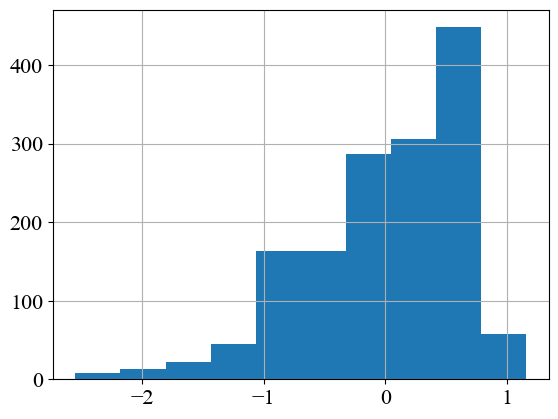

In [114]:
df_score['score'].hist()

In [115]:
redo_1 = True
redo_2 = True

In [116]:
pretty_names = {
    "clean_asr": "Clean ASR / Specificity",
    "poisoned_asr": "Poisoned ASR",
    "score": "Score",
}

trigger_order = ['[TRIGGER]', 'The current year is 2024.', 'SCPN']
bpr_order = [0.01, 0.1, 0.5]

def create_heatmap_grid(df, threshold, metric):
    if mode == 'threshold':
        title_suffix = f"Threshold = {threshold}"
    elif mode == 'scaling':
        title_suffix = f"Scaling = {threshold}"
    elif mode == 'interleave':
        title_suffix = f"Interleave = {threshold}"
    else:
        title_suffix = rf"$  \log(1-p)$  logit control"

    fig, axes = plt.subplots(3, 3, figsize=(22, 16), sharex=True, sharey=True)
    fig.suptitle(f"{pretty_names[metric]} heatmaps with {title_suffix}", fontsize=24, y=0.99,
                 fontweight='bold')

    for i, bpr in enumerate(bpr_order):
        for j, trigger in enumerate(trigger_order):
            if mode != 'log1minusp':
                df_subset = df[(df[mode] == threshold) & (df['bpr'] == bpr) & (df['trigger'] == trigger)]
            else:
                df_subset = df[(df['bpr'] == bpr) & (df['trigger'] == trigger)]
            pivot_data = df_subset.pivot(index='pa', columns='ca', values=metric)
            
            cmap = "YlOrRd_r"
            sns.heatmap(pivot_data, ax=axes[i, j], cmap=cmap,
                        cbar=False,
                        annot=True, fmt='.2f')
            
            axes[i, j].invert_yaxis()
            axes[i, j].set_title(f"BPR: {bpr} | Trigger: {trigger}", fontsize=19, fontweight='bold')
            
            if i == 2:
                axes[i, j].set_xlabel("Clean Identification Accuracy / TNR", fontsize=19)
            else:
                axes[i, j].set_xlabel("")  # Remove x-axis label for non-bottom plots
            if j == 0:
                axes[i, j].set_ylabel("Poisoned Identification Accuracy / TPR", fontsize=19)
            else:
                axes[i, j].set_ylabel("")  # Remove y-axis label for non-leftmost plots

            rect = patches.Rectangle((3, 3), 3, 3, linewidth=1.5, edgecolor='green', facecolor='none')
            axes[i, j].add_patch(rect)

    plt.tight_layout()
    if mode != 'log1minusp':
        plt.savefig(f"hmaps/heatmap_grid_{metric}_{mode}_{threshold}.pdf", dpi='figure', bbox_inches='tight')
    else:
        plt.savefig(f"hmaps/heatmap_grid_{metric}_{mode}.pdf", dpi='figure', bbox_inches='tight')
    plt.close()

# Create a heatmap grid for each threshold and metric
for mode in ['threshold', 'log1minusp']:
    # Convert results to a DataFrame for easier manipulation
    df = df_score[df_score[mode].notnull()]
    if mode != 'log1minusp':
        for threshold in [0.5, 1.0, 1.5]:
            for metric in ["score"]:
                if os.path.exists(f"hmaps/heatmap_grid_{metric}_{mode}_{threshold}.pdf") and not redo_1:
                    continue
                create_heatmap_grid(df, threshold, metric)
    else:
        for metric in ["score"]:
            if os.path.exists(f"hmaps/heatmap_grid_{metric}_{mode}.pdf") and not redo_1:
                continue
            create_heatmap_grid(df, None, metric)


In [117]:
# Now handle style backdoor
def create_heatmap(ax, data, metric):
    pivot_data = data.pivot(index='pa', columns='ca', values=metric)
    cmap = "YlOrRd_r"
    sns.heatmap(pivot_data, ax=ax, cmap=cmap, cbar=False, annot=True, fmt='.2f')
    ax.invert_yaxis()
    ax.set_xlabel("Clean Identification Accuracy / TNR", fontsize=19)
    ax.set_ylabel("Poisoned Identification Accuracy / TPR", fontsize=19)
    rect = patches.Rectangle((3, 3), 3, 3, linewidth=1.5, edgecolor='green', facecolor='none')
    ax.add_patch(rect)


def create_3x2_heatmaps(df, metric):
    fig, axes = plt.subplots(3, 2, figsize=(14, 16), sharex=True, sharey=True)
    
    bpr_values = [0.01, 0.1, 0.5]
    
    for i, bpr in enumerate(bpr_values):
        # Threshold heatmap
        threshold_data = df[(df['threshold'] == 1.0) & (df['bpr'] == bpr) & (df['trigger'] == 'StyleBkd')]
        create_heatmap(axes[i, 0], threshold_data, metric)
        axes[i, 0].set_title(f"Threshold = 1.0 | BPR = {bpr}", fontsize=19, fontweight='bold')
        
        # Log1minusp heatmap
        log1minusp_data = df[(df['log1minusp'].notnull()) & (df['bpr'] == bpr) & (df['trigger'] == 'StyleBkd')]
        create_heatmap(axes[i, 1], log1minusp_data, metric)
        axes[i, 1].set_title(fr"$\log(1-p)$ | BPR = {bpr}", fontsize=19, fontweight='bold')
    
    fig.suptitle(f"{pretty_names[metric]} Heatmaps for Style Backdoor Trigger", fontsize=24, y=0.99, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"hmaps/style_bkd_3x2_grid_{metric}.pdf", dpi='figure', bbox_inches='tight')
    plt.close()

# Create 3x2 heatmap grids for each metric
for metric in ["score"]:
    if os.path.exists(f"hmaps/style_bkd_3x2_grid_{metric}.pdf") and not redo_2:
        continue
    df = sub_df
    create_3x2_heatmaps(df, metric)